<a href="https://colab.research.google.com/github/Ajalyst/Ajay-Kumar-/blob/main/Signmnist_PCA_UMAP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 796.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons

import umap # use 'pip install umap-learn' or 'conda install -c conda-forge umap-learn'


# Importing dataset and examining it
dataset = pd.read_csv("/content/drive/MyDrive/sign_mnist.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

# Dividing dataset into label and feature sets
X = dataset.drop(['label'], axis = 1) # Features
Y = dataset['label'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))
digits=list(dataset['label'])
data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=Y, colorscale='Rainbow', opacity=0.5),
                                text=[f'digit: {a}' for a in digits],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()

# Implementing UMAP to visualize dataset - coloring by label column
u = umap.UMAP(n_components=2, n_neighbors=50, min_dist=0.1)
x_umap = u.fit_transform(X_scaled)

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=Y, colorscale='Rainbow', opacity=0.5),
                                text=[f'digit: {a}' for a in digits],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [ ]:
# Implementing K-Means CLustering on dataset and visualizing clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_pca)
labels=list(kmeans.labels_)
data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'label: {a}' for a in labels],
                                hoverinfo='text')]

layout = go.Layout(title = 'Data with KMeans Labels', width = 500, height = 500,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

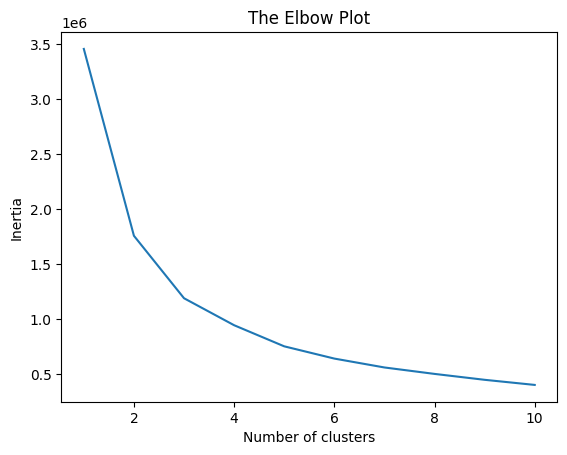

In [ ]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Creating the two dimensional 'Moons' dataset
X,Y = make_moons(n_samples = 200, random_state = 100) # X = two dimensions, Y = label
print(X[:5,])

[[ 3.21490588e-01 -2.34591709e-01]
 [ 8.04518717e-03  3.73407546e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-9.75429787e-01  2.20310533e-01]
 [ 6.03073792e-02  1.57979857e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



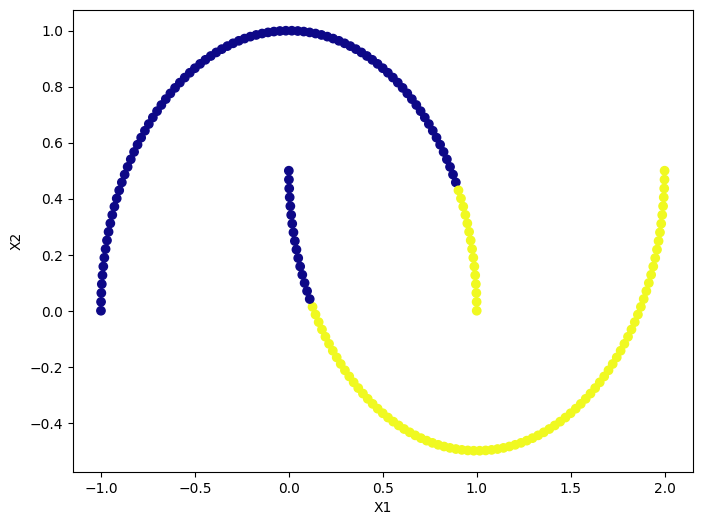

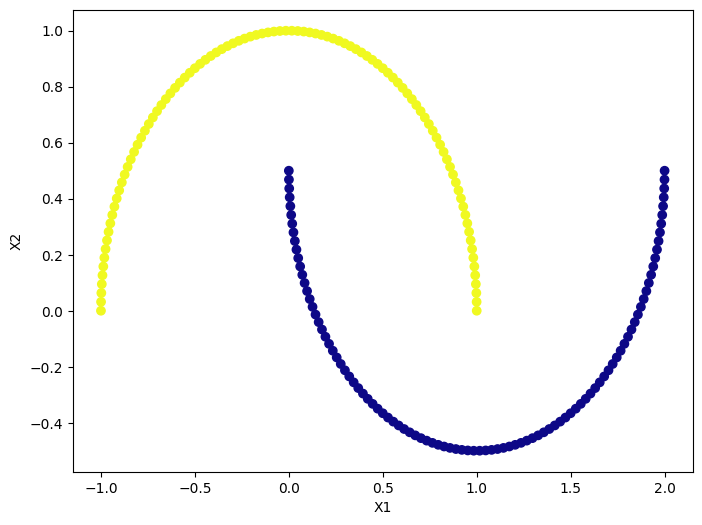

In [ ]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Implementing K-Means CLustering
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Implementing DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=12)
dbscan.fit(X_scaled)
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='plasma')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
